In [1]:
import sys
import pandas as pd
import numpy as np
from scipy.io import whosmat
from scipy.io import loadmat
from io import BytesIO
import datetime

print(sys.executable)


g:\DIYguru\Data-Science-and-Engineering-Analytics\.venv\Scripts\python.exe


### Dataset Acquisition

In [2]:
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0005.mat'))
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0006.mat'))
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0007.mat'))
print(whosmat(r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0018.mat'))

[('B0005', (1, 1), 'struct')]
[('B0006', (1, 1), 'struct')]
[('B0007', (1, 1), 'struct')]
[('B0018', (1, 1), 'struct')]


In [3]:
file_path_B0005 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0005.mat'
file_path_B0006 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0006.mat'
file_path_B0007 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0007.mat'
file_path_B0018 = r'G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\source_data\B0018.mat'

data_B0005 = loadmat(file_path_B0005, struct_as_record=False, squeeze_me=True)
data_B0006 = loadmat(file_path_B0006, struct_as_record=False, squeeze_me=True)
data_B0007 = loadmat(file_path_B0007, struct_as_record=False, squeeze_me=True)
data_B0018 = loadmat(file_path_B0018, struct_as_record=False, squeeze_me=True)

# Access the struct
b0005 = data_B0005['B0005']
b0006 = data_B0006['B0006']
b0007 = data_B0007['B0007']
b0018 = data_B0018['B0018']

# Check what attributes (fields) this struct has
print('b0005 \n',dir(b0005))
print('b0006 \n',dir(b0006))
print('b0007 \n',dir(b0007))
print('b0018 \n',dir(b0018))

b0005 
 ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_fieldnames', 'cycle']
b0006 
 ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_fieldnames', 'cycle']
b0007 
 ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__'

In [4]:
print(b0005.cycle)
print(b0006.cycle)
print(b0007.cycle)
print(b0018.cycle)

In [17]:
#cycles = b0005.cycle
#cycles = b0006.cycle
#cycles = b0007.cycle
cycles = b0018.cycle

print(type(cycles))

<class 'numpy.ndarray'>


In [18]:
print(len(cycles),"\n")

print(cycles[0],"\n")
print([col for col in dir(cycles[0]) if not col.startswith('_')],"\n") 

print(cycles[0].data,"\n")
print([col for col in dir(cycles[0].data) if not col.startswith('_')],"\n") 


319 


['ambient_temperature', 'data', 'time', 'type'] 


['Current_charge', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_charge', 'Voltage_measured'] 



In [ ]:
for i in range(len(cycles)):
    print("cycle",i,": ", cycles[i],"--",[col for col in dir(cycles[i]) if not col.startswith('_')])

In [ ]:
for i in range(len(cycles)):
    print("cycle",i,": ", cycles[i],"--",[col for col in dir(cycles[i].data) if not col.startswith('_')])

In [ ]:
for i in range(len(cycles)):
    print(f"cycle {i}: ambient_temperature = {cycles[i].ambient_temperature}")
    print(f"cycle {i}: time = {cycles[i].time}")
    print(f"cycle {i}: type = {cycles[i].type}")
    if cycles[i].type == 'charge':
        print(f"cycle {i}: Current_charge = {cycles[i].data.Current_charge}")
        print(f"cycle {i}: Current_measured = {cycles[i].data.Current_measured}")
        print(f"cycle {i}: Temperature_measured = {cycles[i].data.Temperature_measured}")
        print(f"cycle {i}: Time = {cycles[i].data.Time}")
        print(f"cycle {i}: Voltage_charge = {cycles[i].data.Voltage_charge}")
        print(f"cycle {i}: Voltage_measured = {cycles[i].data.Voltage_measured}")
    elif cycles[i].type == 'discharge':
        print(f"cycle {i}: Capacity = {cycles[i].data.Capacity}")
        print(f"cycle {i}: Current_load = {cycles[i].data.Current_load}")
        print(f"cycle {i}: Current_measured = {cycles[i].data.Current_measured}")
        print(f"cycle {i}: Temperature_measured = {cycles[i].data.Temperature_measured}")
        print(f"cycle {i}: Time = {cycles[i].data.Time}")
        print(f"cycle {i}: Voltage_load = {cycles[i].data.Voltage_load}")
        print(f"cycle {i}: Voltage_measured = {cycles[i].data.Voltage_measured}")
    elif cycles[i].type == 'impedance':
        print(f"cycle {i}: Battery_current = {cycles[i].data.Battery_current}")
        print(f"cycle {i}: Battery_impedance = {cycles[i].data.Battery_impedance}")
        print(f"cycle {i}: Current_ratio = {cycles[i].data.Current_ratio}")
        print(f"cycle {i}: Rct = {cycles[i].data.Rct}")
        print(f"cycle {i}: Re = {cycles[i].data.Re}")
        print(f"cycle {i}: Rectified_Impedance = {cycles[i].data.Rectified_Impedance}")
        print(f"cycle {i}: Sense_current = {cycles[i].data.Sense_current}")
    

- **def export_cycles_flattened(battery_name, cycles, export_filename, N=None):**
    - Defines a function to flatten and export battery cycle data.
    - `battery_name`: Name/identifier of the battery (used in output).
    - `cycles`: Iterable/list of cycle objects (each could be charge/discharge/impedance).
    - `export_filename`: Output filename for the CSV.
    - `N`: Number of cycles to process (if `None` or `0`, process all cycles).

- **rows = []**
    - Initialize an empty list to store each "flattened" row.

- **total_cycles = len(cycles) if N is None or N == 0 else min(N, len(cycles))**
    - Decide how many cycles to process: all if `N` not provided, or up to `N` cycles.

- **for i, cycle in enumerate(cycles):**
    - Loop over each cycle with index `i`.

- **if i >= total_cycles:**
    - If processed enough cycles, break out of loop.

- **cycle_type = getattr(cycle, 'type', None)**
    - Get the cycle's type attribute ('charge', 'discharge', 'impedance', etc).

- **if not hasattr(cycle, 'data'):**
    - If the cycle has no 'data' attribute, skip this cycle.

- **data = cycle.data**
    - Get the data object for the current cycle.

- **if cycle_type == 'charge':**
    - For charge cycles, define relevant columns.

- **columns = [...]**
    - Specify the list of attributes to extract, depending on the cycle type.

- **elif cycle_type == 'discharge':**
    - For discharge cycles, define different relevant columns.

- **elif cycle_type == 'impedance':**
    - For impedance cycles, yet another set of columns is defined.

- **else:**
    - If cycle type doesn't match any expected, skip the cycle.

- **arr_lens = []**
    - Prepare to find the length of each data array for the chosen columns.

- **for col in columns:**
    - For each column to extract:

- **arr = getattr(data, col, None)**
    - Get the array for the current column, if it exists.

- **if arr is not None and hasattr(arr, '__len__'):**
    - Check if the data exists and is an array with a length.

- **arr_lens.append(len(arr))**
    - Store the array length for this column.

- **if not arr_lens:**
    - If no arrays found, skip this cycle.

- **min_len = min(arr_lens)**
    - Find the (minimum) length of these arrays; ensures no index-out-of-bounds below.

- **for idx in range(min_len):**
    - Loop over array indices, up to the shortest array length (to keep data aligned).

- **row = { ... }**
    - Create a new dictionary to represent a single "flattened" row, including:
        - battery_name, cycle index, type, ambient temp, time (as a datetime).

- **if cycle_type == 'impedance':**
    - If current type is impedance, columns are postprocessed for real part.

- **for col in columns:**
    - For all columns of this cycle type:

- **arr = getattr(data, col, None)**
    - Fetch the column's array again.

- **value = arr[idx] if arr is not None and hasattr(arr, '__getitem__') else None**
    - Safely retrieve the value at current index.

- **row[col] = np.real(value) if value is not None else None**
    - For impedance, store just the real component if it's complex; else None.

- **else:**
    - For other types ('charge'/'discharge'):

- **row[col] = value**
    - Store the value as-is.

- **rows.append(row)**
    - Add this row (dictionary) to the list of all rows.

- **df = pd.DataFrame(rows)**
    - Create a pandas DataFrame from the collected rows.

- **df.to_csv(export_filename, index=False)**
    - Save the DataFrame to CSV (no row index).

- **print(f"Exported flattened DataFrame to {export_filename}")**
    - Print a confirmation message.

- **return df**
    - Return the created DataFrame for further use.

In [7]:
def export_cycles_flattened(battery_name, cycles, export_filename, N=None):

    # No more type_counts logic, handle all cycles or as per N
    rows = []
    total_cycles = len(cycles) if N is None or N == 0 else min(N, len(cycles))

    for i, cycle in enumerate(cycles):
        if i >= total_cycles:
            break
        cycle_type = getattr(cycle, 'type', None)
        if not hasattr(cycle, 'data'):
            continue

        data = cycle.data
        if cycle_type == 'charge':
            columns = ['Current_charge', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_charge', 'Voltage_measured']
        elif cycle_type == 'discharge':
            columns = ['Capacity', 'Current_load', 'Current_measured', 'Temperature_measured', 'Time', 'Voltage_load', 'Voltage_measured']
        elif cycle_type == 'impedance':
            columns = ['Battery_current', 'Battery_impedance', 'Current_ratio', 'Rct', 'Re', 'Rectified_Impedance', 'Sense_current']
        else:
            continue

        arr_lens = []
        for col in columns:
            arr = getattr(data, col, None)
            if arr is not None and hasattr(arr, '__len__'):
                arr_lens.append(len(arr))
        if not arr_lens:
            continue
        min_len = min(arr_lens)

        for idx in range(min_len):
            row = {
                'battery_name': battery_name,
                'cycle': i,
                'type': cycle_type,
                'ambient_temperature': getattr(cycle, 'ambient_temperature', None),
                'time': datetime.datetime(*[int(x) for x in getattr(cycle, 'time', [1970,1,1,0,0,0])])
            }
            if cycle_type == 'impedance':
                for col in columns:
                    arr = getattr(data, col, None)
                    value = arr[idx] if arr is not None and hasattr(arr, '__getitem__') else None
                    row[col] = np.real(value) if value is not None else None
            else:
                for col in columns:
                    arr = getattr(data, col, None)
                    value = arr[idx] if arr is not None and hasattr(arr, '__getitem__') else None
                    row[col] = value
            rows.append(row)

    df = pd.DataFrame(rows)
    df.to_csv(export_filename, index=False)
    print(f"Exported flattened DataFrame to {export_filename}")
    return df

# Example usage:
# export_cycles_flattened(cycles, 'Flattened_b0006.csv', N=10)

In [19]:
df = export_cycles_flattened('b0018', cycles, 'Flattened_b0018.csv')

Exported flattened DataFrame to Flattened_b0018.csv


In [16]:
df.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Capacity,Current_load,Voltage_load,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current
0,b0007,0,charge,24,2008-04-02 13:08:17,-0.0006,-0.003830,24.434244,0.000,0.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b0007,0,charge,24,2008-04-02 13:08:17,-2.2697,-2.261867,24.441053,2.532,2.576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b0007,0,charge,24,2008-04-02 13:08:17,1.4995,1.489161,24.445727,5.500,4.719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b0007,0,charge,24,2008-04-02 13:08:17,1.4995,1.491029,24.459603,8.344,4.745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b0007,0,charge,24,2008-04-02 13:08:17,1.4995,1.491413,24.458385,11.125,4.745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Load from csv to Amazon s3

In [20]:
import os
import pandas as pd

def load_files_from_directory(directory_path, file_types=('csv', 'xls', 'xlsx')):
    """
    Load and append CSV and Excel files from a given directory into a single pandas DataFrame.

    Args:
        directory_path (str): Path to the directory containing the files.
        file_types (tuple): File types to load. Default is ('csv', 'xls', 'xlsx').

    Returns:
        pd.DataFrame: A single DataFrame containing data from all files.
    """
    dataframes = []
    for filename in os.listdir(directory_path):
        filepath = os.path.join(directory_path, filename)
        if os.path.isfile(filepath):
            ext = filename.lower().split('.')[-1]
            try:
                if ext == 'csv' and 'csv' in file_types:
                    df = pd.read_csv(filepath)
                    dataframes.append(df)
                elif ext in ['xls', 'xlsx'] and ext in file_types:
                    df = pd.read_excel(filepath)
                    dataframes.append(df)
            except Exception as e:
                print(f"Failed to load {filename}: {e}")
    if dataframes:
        return pd.concat(dataframes, ignore_index=True)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no files are loaded

In [21]:
DATA_DIR = r"G:\DIYguru\Data-Science-and-Engineering-Analytics\Capstone_Project\jupyter_notebooks"
DATA_DIR = load_files_from_directory(DATA_DIR)

print(f"Combined DataFrame shape: {DATA_DIR.shape}")

Combined DataFrame shape: (2123643, 21)


In [22]:
'''
This cell loads AWS credentials from a .env file using python-dotenv,
creates a boto3 S3 client with those credentials,
and lists all S3 buckets in the account.
'''

import os
from dotenv import load_dotenv
import boto3

# Load environment variables from .env
load_dotenv()

# Create boto3 client using loaded environment variables
s3 = boto3.client("s3",
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    region_name=os.getenv("AWS_DEFAULT_REGION")
)

# Example: list buckets
buckets = s3.list_buckets()
print("Your S3 Buckets:")
for bucket in buckets['Buckets']:
    print(f" - {bucket['Name']}")

Your S3 Buckets:
 - s3aravindh973515031797


In [23]:
bucket_name = 's3aravindh973515031797'

response = s3.list_objects_v2(Bucket=bucket_name)
for item in response.get("Contents", []):
    print(item["Key"])

Cleaned up VED Source Data/
Cleaned up VED Source Data/df_ICE_HEV.parquet
Cleaned up VED Source Data/df_PHEV_EV.parquet
Cleaned up VED Source Data/df_VED.parquet
Cleaned up VED Source Data/df_combined.parquet
Cleaned up VED Source Data/df_dynamic_sample.parquet
Cleaned up VED Source Data/df_static.parquet
DIYguru ML Source Data/
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171101_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171108_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171115_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171122_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171129_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171206_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171213_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171220_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_171227_week.csv
DIYguru ML Source Data/VED_DynamicData_Part1/VED_180103_week.csv
DIYguru ML Source D

In [24]:
def push_df_to_s3_parquet(df, object_key):
    """
    Pushes a pandas DataFrame to a predefined S3 bucket as a Parquet file.

    Args:
        df (pd.DataFrame): DataFrame to upload.
        object_key (str): S3 object key (path/filename.parquet).
    """
    from io import BytesIO
    parquet_buffer = BytesIO()
    df.to_parquet(parquet_buffer, index=False)
    parquet_buffer.seek(0)
    s3.upload_fileobj(parquet_buffer, bucket_name, object_key)
    print(f"DataFrame uploaded to s3://{bucket_name}/{object_key}")

# Example usage:
# push_df_to_s3_parquet(df_static, 'path/to/df_static.parquet')

In [25]:
push_df_to_s3_parquet(DATA_DIR, 'EV_Battery_Health_Source/EV_Battery_Health_Source.parquet')

DataFrame uploaded to s3://s3aravindh973515031797/EV_Battery_Health_Source/EV_Battery_Health_Source.parquet


### Data Load from Amazon s3 bucket

In [26]:
from io import BytesIO

def read_parquet_from_s3(bucket_name, object_key):
        """
        Reads a Parquet file from an AWS S3 bucket using the global s3 client.

        Args:
            bucket_name: Name of the S3 bucket.
            object_key: Key (path) to the Parquet file in the S3 bucket.

        Returns:
            DataFrame containing the Parquet data.
        """
        response = s3.get_object(Bucket=bucket_name, Key=object_key)
        file_content = response['Body'].read()
        df = pd.read_parquet(BytesIO(file_content))
        return df

In [ ]:
#del df

In [27]:
bucket_name = 's3aravindh973515031797'
df = 'EV_Battery_Health_Source/EV_Battery_Health_Source.parquet'

In [28]:
df = read_parquet_from_s3(bucket_name, df)

In [29]:
df.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Capacity,Current_load,Voltage_load,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current
0,b0005,0,charge,24,2008-04-02 13:08:17,0.000,-0.001201,24.655358,0.000,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b0005,0,charge,24,2008-04-02 13:08:17,-4.036,-4.030268,24.666480,2.532,1.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.512731,24.675394,5.500,4.726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.509063,24.693865,8.344,4.742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.511318,24.705069,11.125,4.753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123643 entries, 0 to 2123642
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   battery_name          object 
 1   cycle                 int64  
 2   type                  object 
 3   ambient_temperature   int64  
 4   time                  object 
 5   Current_charge        float64
 6   Current_measured      float64
 7   Temperature_measured  float64
 8   Time                  float64
 9   Voltage_charge        float64
 10  Voltage_measured      float64
 11  Capacity              float64
 12  Current_load          float64
 13  Voltage_load          float64
 14  Battery_current       float64
 15  Battery_impedance     float64
 16  Current_ratio         float64
 17  Rct                   float64
 18  Re                    float64
 19  Rectified_Impedance   float64
 20  Sense_current         float64
dtypes: float64(16), int64(2), object(3)
memory usage: 340.2+ MB


### Exploratory Data Analysis (EDA)

In [31]:
# unique battery name

print("battery_name \n",df['battery_name'].unique())
print("type \n",df['type'].unique())
print("cycle \n",df['cycle'].unique())

battery_name 
 ['b0005' 'b0006' 'b0007' 'b0018']
type 
 ['charge' 'discharge' 'impedance']
cycle 
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 

In [32]:
df[['battery_name','type','cycle','Capacity','Voltage_measured','Current_measured','Temperature_measured']].head()

,battery_name,type,cycle,Capacity,Voltage_measured,Current_measured,Temperature_measured
0,b0005,charge,0,NaN,3.873017,-0.001201,24.655358
1,b0005,charge,0,NaN,3.479394,-4.030268,24.666480
2,b0005,charge,0,NaN,4.000588,1.512731,24.675394
3,b0005,charge,0,NaN,4.012395,1.509063,24.693865
4,b0005,charge,0,NaN,4.019708,1.511318,24.705069


In [33]:
df[df['type'] == 'charge'][['battery_name','type','cycle','Capacity','Voltage_measured','Current_measured','Temperature_measured']].head()

,battery_name,type,cycle,Capacity,Voltage_measured,Current_measured,Temperature_measured
0,b0005,charge,0,NaN,3.873017,-0.001201,24.655358
1,b0005,charge,0,NaN,3.479394,-4.030268,24.666480
2,b0005,charge,0,NaN,4.000588,1.512731,24.675394
3,b0005,charge,0,NaN,4.012395,1.509063,24.693865
4,b0005,charge,0,NaN,4.019708,1.511318,24.705069


In [34]:
df[df['type'] == 'discharge'][['battery_name','type','cycle','Capacity','Voltage_measured','Current_measured','Temperature_measured']].head()

,battery_name,type,cycle,Capacity,Voltage_measured,Current_measured,Temperature_measured
789,b0005,discharge,1,NaN,4.191492,-0.004902,24.330034
790,b0005,discharge,1,NaN,4.190749,-0.001478,24.325993
791,b0005,discharge,1,NaN,3.974871,-2.012528,24.389085
792,b0005,discharge,1,NaN,3.951717,-2.013979,24.544752
793,b0005,discharge,1,NaN,3.934352,-2.011144,24.731385


In [35]:
df[df['type'] == 'impedance'][['battery_name','type','cycle','Capacity','Voltage_measured','Current_measured','Temperature_measured']].head()

,battery_name,type,cycle,Capacity,Voltage_measured,Current_measured,Temperature_measured
22900,b0005,impedance,40,NaN,NaN,NaN,NaN
22901,b0005,impedance,40,NaN,NaN,NaN,NaN
22902,b0005,impedance,40,NaN,NaN,NaN,NaN
22903,b0005,impedance,40,NaN,NaN,NaN,NaN
22904,b0005,impedance,40,NaN,NaN,NaN,NaN


In [36]:
df.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Capacity,Current_load,Voltage_load,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current
0,b0005,0,charge,24,2008-04-02 13:08:17,0.000,-0.001201,24.655358,0.000,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b0005,0,charge,24,2008-04-02 13:08:17,-4.036,-4.030268,24.666480,2.532,1.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.512731,24.675394,5.500,4.726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.509063,24.693865,8.344,4.742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.511318,24.705069,11.125,4.753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#del df_cap

In [37]:
df_cap = df[df['battery_name'] == 'b0005']

In [38]:
df_cap.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Capacity,Current_load,Voltage_load,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current
0,b0005,0,charge,24,2008-04-02 13:08:17,0.000,-0.001201,24.655358,0.000,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b0005,0,charge,24,2008-04-02 13:08:17,-4.036,-4.030268,24.666480,2.532,1.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.512731,24.675394,5.500,4.726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.509063,24.693865,8.344,4.742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.511318,24.705069,11.125,4.753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Capacity Degradation Curves

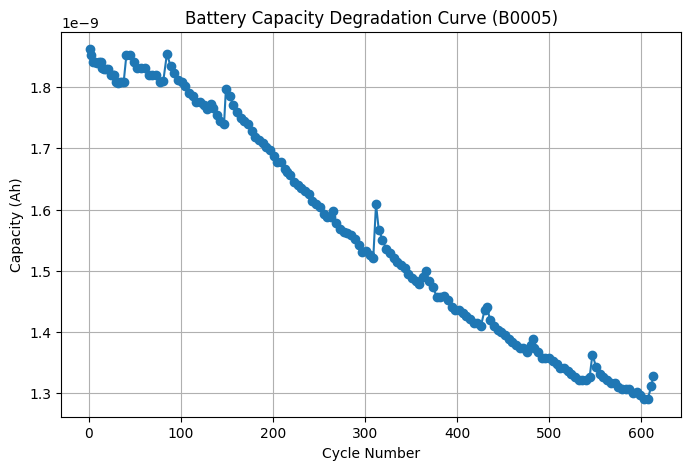

     cycle   capacity_Ah
0        1  1.861863e-09
1        3  1.851748e-09
2        5  1.841009e-09
3        7  1.840713e-09
4        9  1.840104e-09
..     ...           ...
163    599  1.296466e-09
164    603  1.291251e-09
165    607  1.290171e-09
166    611  1.311937e-09
167    613  1.327790e-09

[168 rows x 2 columns]


In [40]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the time column to datetime
df_cap['Time'] = pd.to_datetime(df_cap['Time'], errors='coerce')

# Sort to ensure correct sequence per cycle
df_cap = df_cap.sort_values(['cycle', 'Time'])

# Compute time difference (in seconds) per cycle
df_cap['delta_t'] = df_cap.groupby('cycle')['Time'].diff().dt.total_seconds().fillna(0)

# Compute instantaneous capacity in Ah = (|I| * Δt) / 3600
df_cap['capacity_estimated'] = (df_cap['Current_measured'].abs() * df_cap['delta_t']) / 3600

# Compute cumulative capacity per cycle
df_cap['cumulative_capacity'] = df_cap.groupby('cycle')['capacity_estimated'].cumsum()

# Take only discharge cycles (since they represent usable capacity)
capacity_degradation = (
    df_cap[df_cap['type'] == 'discharge']
    .groupby('cycle')['cumulative_capacity']
    .max()
    .reset_index()
    .rename(columns={'cumulative_capacity': 'capacity_Ah'})
)

# Plot Capacity Degradation Curve
plt.figure(figsize=(8,5))
plt.plot(capacity_degradation['cycle'], capacity_degradation['capacity_Ah'], marker='o')
plt.title('Battery Capacity Degradation Curve (B0005)')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity (Ah)')
plt.grid(True)
plt.show()

# Display summary
print(capacity_degradation)


### Understanding `df['delta_t'] = df.groupby(['battery_name', 'cycle'])['Time'].diff().dt.total_seconds().fillna(0)`

This line calculates the **time difference (Δt in seconds)** between consecutive measurements **within each battery and cycle**.

**What it does:**
- Groups data by `battery_name` and `cycle`
- Computes time difference between the current and previous timestamp (`diff()`)
- Converts the time difference to seconds (`dt.total_seconds()`)
- Replaces the first value in each group with `0` (`fillna(0)`)

**Example**

| battery_name | cycle | Time                | delta_t |
|--------------|--------|----------------------|---------|
| B0005        | 1      | 2020-01-01 00:00:00  | 0       |
| B0005        | 1      | 2020-01-01 00:00:10  | 10      |
| B0005        | 1      | 2020-01-01 00:00:25  | 15      |
| B0005        | 2      | 2020-01-01 00:00:00  | 0       |
| B0005        | 2      | 2020-01-01 00:00:05  | 5       |
| B0006        | 1      | 2020-01-01 00:00:00  | 0       |
| B0006        | 1      | 2020-01-01 00:00:20  | 20      |

**Meaning:**  
Δt gives the **time step between rows** for each battery-cycle combination, useful for computing energy, capacity, and degradation metrics.


### Understanding `df['capacity_estimated'] = (df['Current_measured'].abs() * df['delta_t']) / 3600`

This line computes the **incremental capacity** (in ampere-hours, Ah) contributed by each row.

### Formula
The capacity for a time step is:

$$
\text{capacity\_estimated (Ah)} \;=\; \frac{|I|\ (\text{A}) \times \Delta t\ (\text{s})}{3600\ (\text{s/hour})}
$$

Where:
- \(I\) = `Current_measured` (A). We use \(|I|\) because capacity is the magnitude of charge transferred.
- \(\Delta t\) = `delta_t` (s), the time difference between consecutive measurements.
- Dividing by 3600 converts ampere-seconds to ampere-hours.

### Example
- If `Current_measured = -2.0` A and `delta_t = 10` s:

$$
\text{capacity} = \frac{|{-2.0}|\times 10}{3600} = \frac{20}{3600} = 0.005555\ldots\ \text{Ah} \approx 0.00556\ \text{Ah}
$$


### Understanding `df['cumulative_capacity'] = df.groupby(['battery_name', 'cycle'])['capacity_estimated'].cumsum()`

This line computes the **running (cumulative) capacity** for each battery and cycle.

### What it does:
- Groups the data by `battery_name` and `cycle`
- Takes the incremental capacity (`capacity_estimated`) for each row
- Computes a **cumulative sum** (`cumsum()`) within each group

Mathematically, for each row \(k\):

$$
\text{cumulative\_capacity}_k \;=\; \sum_{i=1}^{k} \text{capacity\_estimated}_i
$$

### Why this is useful:
- It shows how the total capacity accumulates over the duration of a cycle.
- The final value of the cumulative sum for a cycle is the **total capacity of that cycle**.

### Example

| Row | capacity_estimated (Ah) | cumulative_capacity (Ah) |
|-----|--------------------------|---------------------------|
| 1   | 0.002                    | 0.002                     |
| 2   | 0.003                    | 0.005                     |
| 3   | 0.004                    | 0.009                     |

### Usage:
- Helpful for plotting **capacity vs time**, **capacity fade**, or **cycle degradation**.
- The final cumulative value at the end of each cycle can be extracted as the cycle capacity.


### Plot capacity vs. cycle number for all batteries

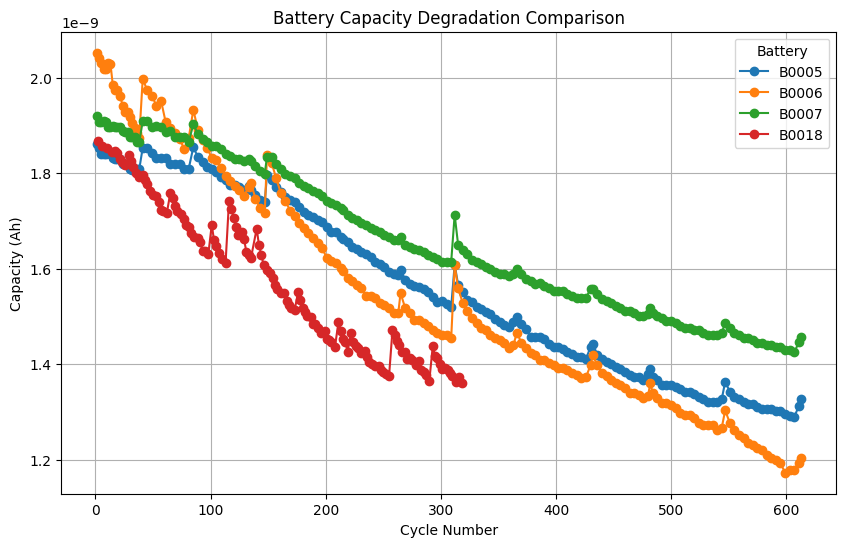

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Sort properly
df = df.sort_values(['battery_name', 'cycle', 'Time'])

# Compute delta time per battery per cycle
df['delta_t'] = df.groupby(['battery_name', 'cycle'])['Time'].diff().dt.total_seconds().fillna(0)

# Compute instantaneous Ah
df['capacity_estimated'] = (df['Current_measured'].abs() * df['delta_t']) / 3600

# Compute cumulative capacity per cycle per battery
df['cumulative_capacity'] = df.groupby(['battery_name', 'cycle'])['capacity_estimated'].cumsum()

# Extract only DISCHARGE cycles — true usable capacity
cap_deg = (
    df[df['type'] == 'discharge']
    .groupby(['battery_name', 'cycle'])['cumulative_capacity']
    .max()
    .reset_index()
    .rename(columns={'cumulative_capacity': 'capacity_Ah'})
)

# Plot all batteries
plt.figure(figsize=(10,6))

for b in cap_deg['battery_name'].unique():
    temp = cap_deg[cap_deg['battery_name'] == b]
    plt.plot(temp['cycle'], temp['capacity_Ah'], marker='o', label=b.upper())

plt.title("Battery Capacity Degradation Comparison")
plt.xlabel("Cycle Number")
plt.ylabel("Capacity (Ah)")
plt.grid(True)
plt.legend(title="Battery")
plt.show()


### **=== Original DataFrame ===**

| battery_name | cycle | Time                | Current_measured | type      |
|--------------|-------|---------------------|------------------|-----------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge |

---

### **=== After Converting Time to datetime ===**

| battery_name | cycle | Time                | Current_measured | type      |
|--------------|-------|---------------------|------------------|-----------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge |

---

### **=== After Sorting ===**

| battery_name | cycle | Time                | Current_measured | type      |
|--------------|-------|---------------------|------------------|-----------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge |

---

### **=== After Computing `delta_t` ===**

| battery_name | cycle | Time                | Current_measured | type      | delta_t |
|--------------|-------|---------------------|------------------|-----------|---------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    | 0.0     |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    | 10.0    |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge | 15.0    |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    | 0.0     |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge | 20.0    |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge | 0.0     |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge | 20.0    |

---

### **=== After Computing `capacity_estimated` ===**

| battery_name | cycle | Time                | Current_measured | type      | delta_t | capacity_estimated |
|--------------|-------|---------------------|------------------|-----------|---------|---------------------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    | 0.0     | 0.000000            |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    | 10.0    | 0.005000            |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge | 15.0    | 0.002083            |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    | 0.0     | 0.000000            |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge | 20.0    | 0.011111            |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge | 0.0     | 0.000000            |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge | 20.0    | 0.006667            |

---

### **=== After Computing `cumulative_capacity` ===**

| battery_name | cycle | Time                | Current_measured | type      | delta_t | capacity_estimated | cumulative_capacity |
|--------------|-------|---------------------|------------------|-----------|---------|---------------------|----------------------|
| B0005        | 1     | 2020-01-01 00:00:00 | -1.5             | charge    | 0.0     | 0.000000            | 0.000000             |
| B0005        | 1     | 2020-01-01 00:00:10 | -1.8             | charge    | 10.0    | 0.005000            | 0.005000             |
| B0005        | 1     | 2020-01-01 00:00:25 | 0.5              | discharge | 15.0    | 0.002083            | 0.007083             |
| B0005        | 2     | 2020-01-02 00:00:00 | -2.0             | charge    | 0.0     | 0.000000            | 0.000000             |
| B0005        | 2     | 2020-01-02 00:00:20 | 2.0              | discharge | 20.0    | 0.011111            | 0.011111             |
| B0006        | 1     | 2020-01-01 00:00:00 | 1.0              | discharge | 0.0     | 0.000000            | 0.000000             |
| B0006        | 1     | 2020-01-01 00:00:20 | 1.2              | discharge | 20.0    | 0.006667            | 0.006667             |

---

### **=== Discharge Capacity Per Cycle (`cap_deg`) ===**

| battery_name | cycle | capacity_Ah |
|--------------|-------|-------------|
| B0005        | 1     | 0.007083    |
| B0005        | 2     | 0.011111    |
| B0006        | 1     | 0.006667    |


### Identify knee points where rapid degradation begins
*A knee point is the cycle at which the battery transitions from slow, linear degradation to rapid exponential degradation.*

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123643 entries, 0 to 2123642
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   battery_name          object        
 1   cycle                 int64         
 2   type                  object        
 3   ambient_temperature   int64         
 4   time                  object        
 5   Current_charge        float64       
 6   Current_measured      float64       
 7   Temperature_measured  float64       
 8   Time                  datetime64[ns]
 9   Voltage_charge        float64       
 10  Voltage_measured      float64       
 11  Capacity              float64       
 12  Current_load          float64       
 13  Voltage_load          float64       
 14  Battery_current       float64       
 15  Battery_impedance     float64       
 16  Current_ratio         float64       
 17  Rct                   float64       
 18  Re                    float64       
 19  

In [46]:
df.head()

,battery_name,cycle,type,ambient_temperature,time,Current_charge,Current_measured,Temperature_measured,Time,Voltage_charge,...,Battery_current,Battery_impedance,Current_ratio,Rct,Re,Rectified_Impedance,Sense_current,delta_t,capacity_estimated,cumulative_capacity
0,b0005,0,charge,24,2008-04-02 13:08:17,0.000,-0.001201,24.655358,1970-01-01 00:00:00.000000000,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
1,b0005,0,charge,24,2008-04-02 13:08:17,-4.036,-4.030268,24.666480,1970-01-01 00:00:00.000000002,1.570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e-09,2.239038e-12,2.239038e-12
2,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.512731,24.675394,1970-01-01 00:00:00.000000005,4.726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e-09,1.260609e-12,3.499647e-12
3,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.509063,24.693865,1970-01-01 00:00:00.000000008,4.742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e-09,1.257553e-12,4.757200e-12
4,b0005,0,charge,24,2008-04-02 13:08:17,1.500,1.511318,24.705069,1970-01-01 00:00:00.000000011,4.753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e-09,1.259432e-12,6.016631e-12


Knee cycle for B0005: 13


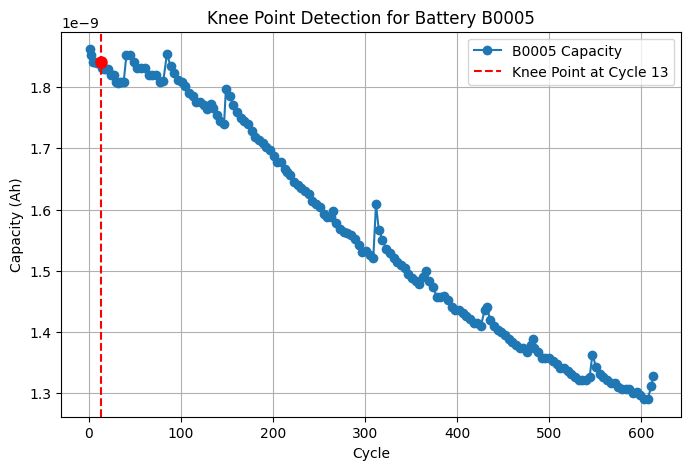

Knee cycle for B0006: 13


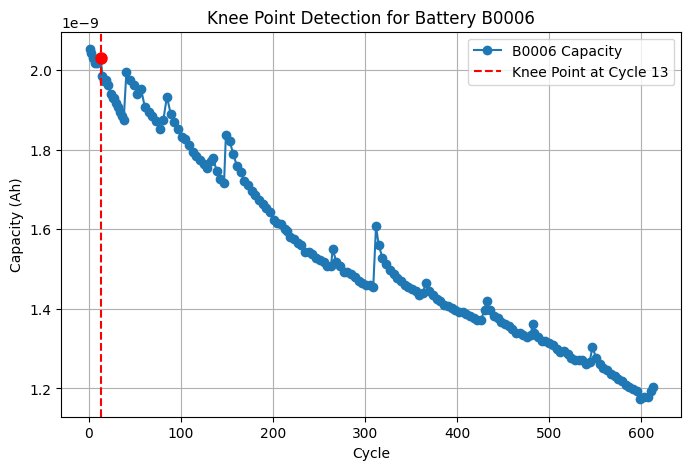

Knee cycle for B0007: 9


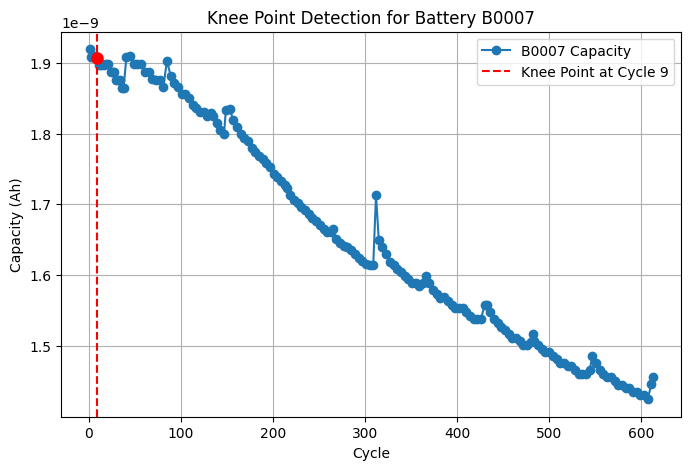

Knee cycle for B0018: 17


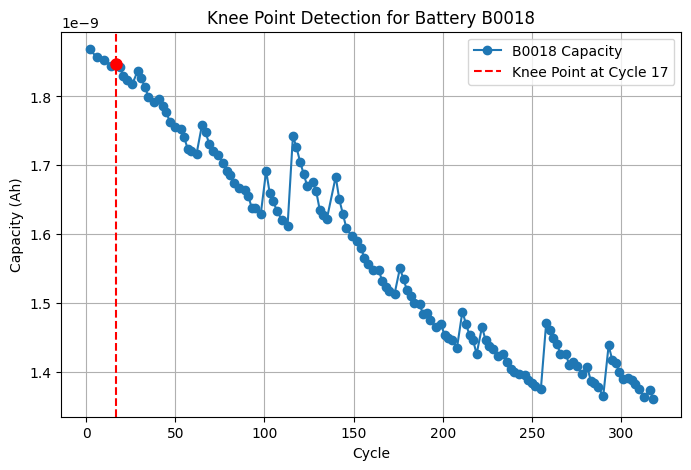


Summary of Knee Points:
{'b0005': np.int64(13), 'b0006': np.int64(13), 'b0007': np.int64(9), 'b0018': np.int64(17)}


In [48]:
# ...existing code...
from kneed import KneeLocator
import matplotlib.pyplot as plt

# The 'cap_deg' DataFrame was created in cell #VSC-395ddfaf
# It contains the discharge capacity (capacity_Ah) for each battery and cycle.

battery_names = cap_deg['battery_name'].unique() # Use cap_deg for battery names

knee_points = {}

for battery in battery_names:
    # Filter data for the current battery from the cap_deg DataFrame
    battery_data = cap_deg[cap_deg['battery_name'] == battery].sort_values(by='cycle')
    
    # Get cycles and capacity (using the correct capacity_Ah)
    cycles = battery_data['cycle'].values
    capacity = battery_data['capacity_Ah'].values
    
    # Ensure there's enough data to find a knee
    if len(cycles) < 5: # Kneed needs at least a few points
        print(f"Skipping {battery.upper()}: Not enough cycles ({len(cycles)}) for knee detection.")
        knee_points[battery] = None
        continue

    # Find the knee point
    try:
        knee = KneeLocator(
            x=cycles,
            y=capacity,
            S=1.0, # Sensitivity parameter: Higher S means fewer knees. Adjust if needed.
            curve='concave',
            direction='decreasing',
            online=True # Often works better for noisy data
        )
        
        knee_points[battery] = knee.knee
        
        print(f"Knee cycle for {battery.upper()}: {knee.knee}")

        # Plot for each battery
        plt.figure(figsize=(8, 5))
        plt.plot(cycles, capacity, marker='o', linestyle='-', label=f'{battery.upper()} Capacity')
        if knee.knee is not None:
            plt.axvline(x=knee.knee, color='r', linestyle='--', label=f'Knee Point at Cycle {int(knee.knee)}')
            plt.plot(knee.knee, knee.knee_y, 'ro', markersize=8) # Mark the knee point on the curve
        plt.xlabel("Cycle")
        plt.ylabel("Capacity (Ah)")
        plt.title(f'Knee Point Detection for Battery {battery.upper()}')
        plt.grid(True)
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Could not find knee point for {battery.upper()}: {e}")
        knee_points[battery] = None

print("\nSummary of Knee Points:")
print(knee_points)